# Preprocessing PC6 DATA

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [12]:
df = pd.read_csv("CBS_PC6_2016_v2_tested.csv")
df = df[["PC6","P_NW_MIG_A","M_INKHH","WOZWONING","UITKMINAOW"]]
df2 = pd.read_csv("Amsterdam_PC6_CBS_2016_V2.csv")
df2 = df2[["PC6"]]
df = df.merge(df2, on="PC6")

In [14]:
m_inkhh = df[['PC6','M_INKHH']]
uitkminaow = df[['PC6','UITKMINAOW']]

inwoners_df = df[["PC6","INWONER", "MAN","VROUW"]]
woning_df = df[["PC6","AANTAL_HH","TOTHH_EENP","GEM_HH_GR","G_GAS_WON","G_ELEK_WON"]]

inkomen_aow_df = df[["PC6","M_INKHH","UITKMINAOW"]]
hhinkomen = ['00-20 laag','00-40 laag tot onder midden','00-60 laag tot midden','20-40 onder midden', '20-60 onder midden tot midden','20-80 onder midden tot boven midden','40-60 midden', '20-80 onder midden tot boven','40-80 midden tot boven midden','60-80 boven midden', '60-100 boven midden tot hoog', '80-100 hoog']
n_hhinkomen = [1,2,3,4,5,6,7,8,9,10,11,12]
inkomen_aow_df = inkomen_aow_df.replace(hhinkomen, n_hhinkomen)

av_SUPERM_df = df[["PC6","AV1_SUPERM","AV3_SUPERM","AV5_SUPERM"]]
av_RESTAU_df = df[["PC6","AFS_RESTAU","AV1_RESTAU","AV3_RESTAU","AV5_RESTAU"]]
av_OPVANG_df = df[["PC6","AFS_BSO","AV1_BSO","AV3_BSO","AV5_BSO","AFS_KDV","AV1_KDV","AV3_KDV","AV5_KDV"]]
av_TRANS_df = df[["PC6","AFS_OPRIT","AFS_TRNOVS","AFS_TREINS"]]
av_SCHOOL_df = df[["PC6","AFS_ONDBAS","AV1_ONDBAS","AV3_ONDBAS","AV5_ONDBAS","AFS_ONDHV","AV3_ONDHV","AV5_ONDHV","AV10_ONDHV","AFS_ONDVMB","AV3_ONDVMB","AV5_ONDVMB","AV10ONDVMB","AFS_ONDVRT","AV3_ONDVRT","AV5_ONDVRT","AV10ONDVRT"]]
av_GEZOND_df = df[["PC6","AFS_HAPRAK","AV1_HAPRAK","AV3_HAPRAK","AV5_HAPRAK","AFS_ZIEK_E","AV5_ZIEK_E","AV10ZIEK_E","AV20ZIEK_E","AFS_ZIEK_I","AV5_ZIEK_I", "AV10ZIEK_I", "AV20ZIEK_I", "AFS_APOTH", "AFS_HAPOST"]]

In [12]:
def clean_df(df):
    for f in df.columns:
        df = df[df[f] != -99997]
        df = df[df[f] != 'onclassificeerbaar']
        df = df[df[f] != '-99997']
    return df

In [50]:
inwoners_df = clean_df(inwoners_df)
woning_df = clean_df(woning_df)

inkomen_aow_df = clean_df(inkomen_aow_df)
inkomen_aow_df.M_INKHH = pd.to_numeric(inkomen_aow_df.M_INKHH)
inkomen_aow_df.UITKMINAOW = pd.to_numeric(inkomen_aow_df.UITKMINAOW)

av_SUPERM_df = clean_df(av_SUPERM_df)
av_RESTAU_df = clean_df(av_RESTAU_df)
av_OPVANG_df = clean_df(av_OPVANG_df)
av_TRANS_df = clean_df(av_TRANS_df)
av_SCHOOL_df = clean_df(av_SCHOOL_df)
av_GEZOND_df = clean_df(av_GEZOND_df)

/home/frank/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [52]:
#Using Pearson Correlation
def heatmap_pearson(df):
    plt.figure(figsize=(12,10))
    cor = df.corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
    plt.show()

In [53]:
df_n = pd.merge(inkomen_aow_df, woning_df, on=['PC6'])

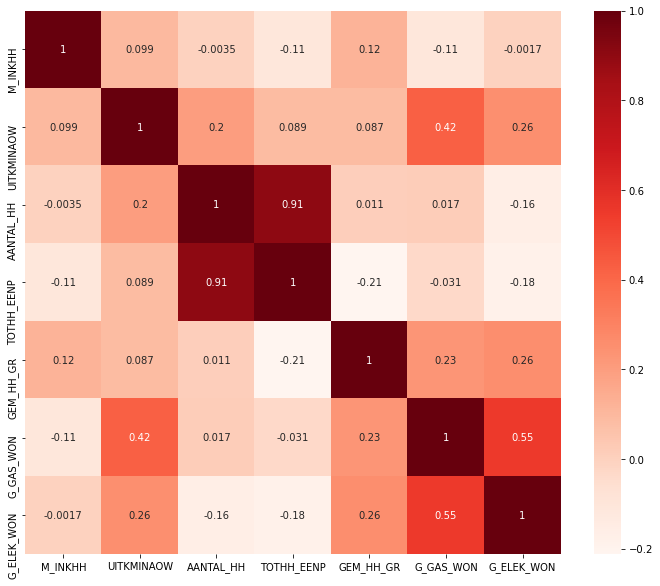

In [54]:
heatmap_pearson(df_n)

In [5]:
aow_oud = ['00-20 laag','00-40 laag tot onder midden','00-60 laag tot midden','20-40 onder midden', '20-60 onder midden tot midden','20-80 onder midden tot boven midden','40-60 midden', '20-80 onder midden tot boven','40-80 midden tot boven midden','60-80 boven midden', '60-100 boven midden tot hoog', '80-100 hoog']
[10,20,30,35,40,45,50,55,60,70,80,90]

In [6]:
aow_oud 

['00-20 laag',
 '00-40 laag tot onder midden',
 '00-60 laag tot midden',
 '20-40 onder midden',
 '20-60 onder midden tot midden',
 '20-80 onder midden tot boven midden',
 '40-60 midden',
 '20-80 onder midden tot boven',
 '40-80 midden tot boven midden',
 '60-80 boven midden',
 '60-100 boven midden tot hoog',
 '80-100 hoog']

In [ ]:
Laag = 0-20
Midden = 40-60
Hoog = 80-100